In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#will allow the plot to be directly displayed below the code
from matplotlib import style
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# used for standardizing features by removing the mean and scaling to unit variance.
#Scaling to unit variance will ensure that the features are on a similar scale, preventing certain features from dominating others during the training process.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [21]:
warnings.filterwarnings('ignore') #to ignore all the possible warnings that may occur in the code
# dataset :  https://archive.ics.uci.edu/dataset/186/wine+quality
red_wine_df = pd.read_csv(r"C:\Users\Jiya Sharma\Dropbox\PC\Downloads\wine+quality\winequality-red.csv", sep=';')
red_wine_df['wine_type'] = 'red'
white_wine_df = pd.read_csv(r"C:\Users\Jiya Sharma\Dropbox\PC\Downloads\wine+quality\winequality-white.csv", sep=';')
white_wine_df['wine_type'] = 'white'

# concatenating the two red and white wine datasets
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)


In [22]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [23]:
# to count the occurence of each unique value in the quantity column 
wine_df['quality'].value_counts()
#the more is the rating the higher will be the quality as there 5 unique instances of Quality rating 9 

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [24]:
#it will select the columns that have numeric data 
numeric_cols = wine_df.select_dtypes(include=[np.number]).columns
# it calculates the pairwise correlation coefficients
correlation_matrix = wine_df[numeric_cols].corr()

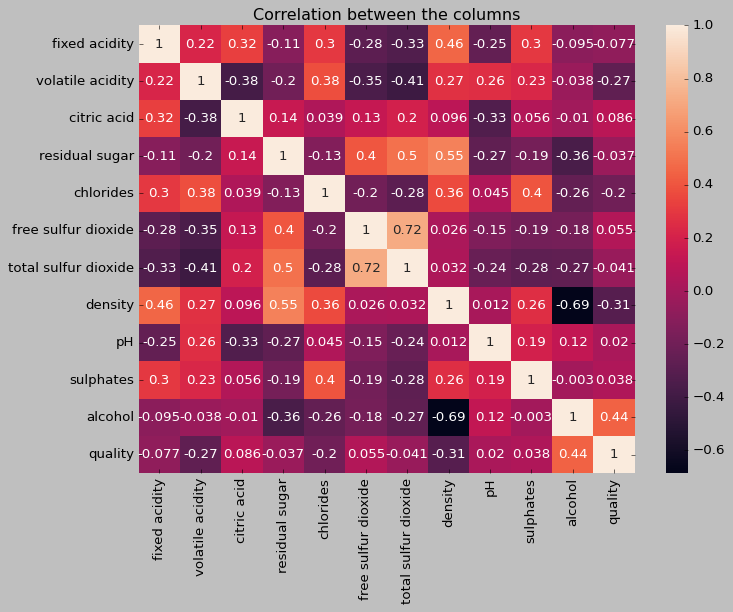

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation between the columns')
plt.show()
#it means that alcohol contributes the most as it shows a positive correlation

In [26]:
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)
wine_df['quality'].value_counts()
#it will classify the dataframe as 1 and 0 if the quality rating is greater than 7 

quality
0    5220
1    1277
Name: count, dtype: int64

In [27]:
#this will drop the columns quality and wine type from the actual dataframe
X = wine_df.drop(['quality', 'wine_type'], axis=1)
y = wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#it will be used to scale the features of the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
#linear logistic regression model
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)
lm_pred = lm.predict(X_test_scaled)


In [29]:
lm_accuracy = accuracy_score(lm_pred, y_test)
print("Accuracy is: {:.2f}%".format(lm_accuracy * 100))


Accuracy is: 82.62%


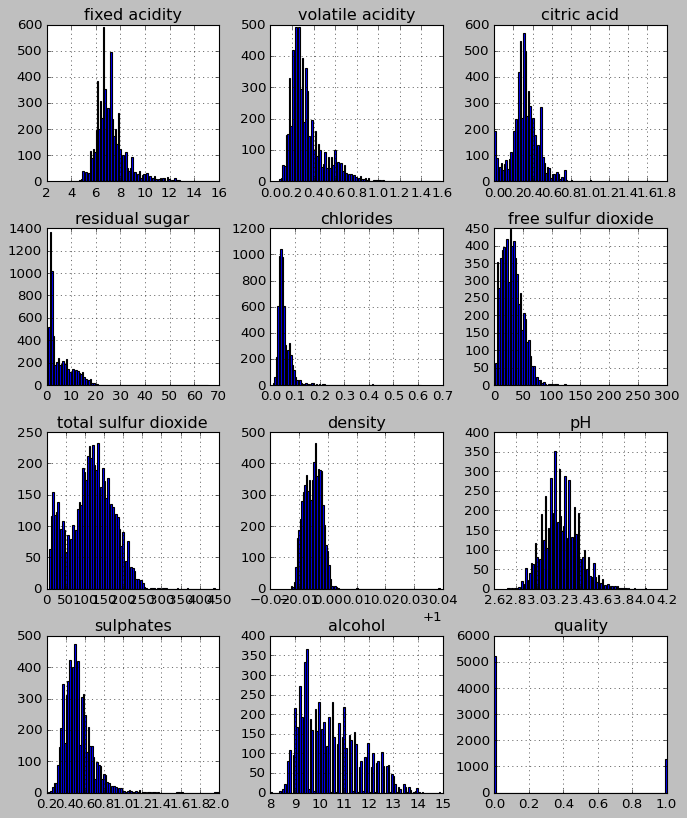

In [30]:
wine_df.hist(bins=100, figsize=(10, 12))
plt.show()
#different features and their values

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lm_pred))
#precision = true / total precision  this means that 85% instances are predicted as class 0 and 58% as class 1
#f1score = harmonic mean of precision and recall
#support = actual occurences of the class
#macro avg = average performance 
#weighted avg = average performance + support 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1585
           1       0.58      0.27      0.37       365

    accuracy                           0.83      1950
   macro avg       0.71      0.61      0.63      1950
weighted avg       0.80      0.83      0.80      1950



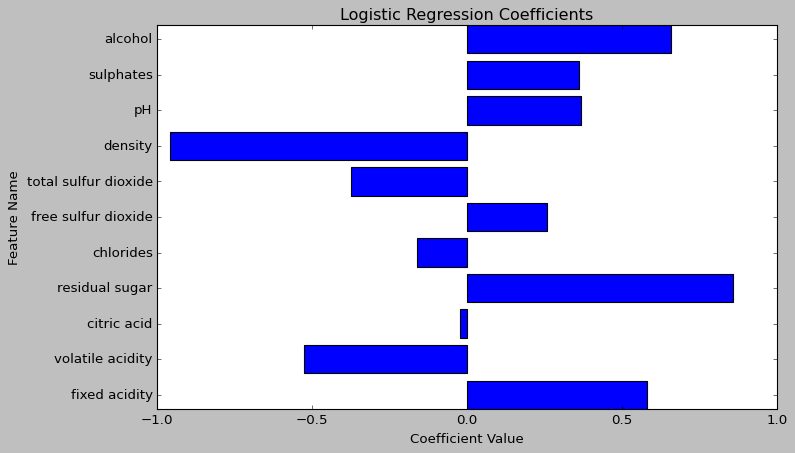

In [32]:

feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, lm.coef_[0])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()
#it gives the value of coefficients for each feature

TN :  1512
FN :  266
TP :  99
TP :  73


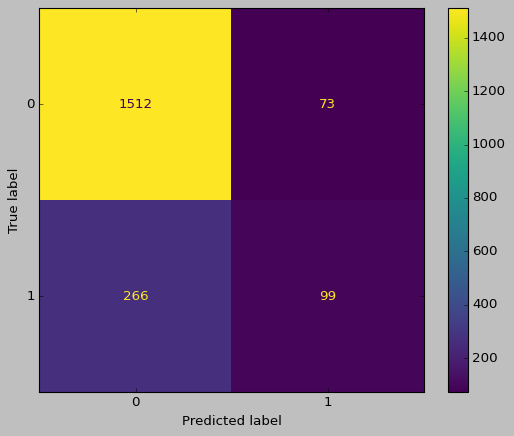

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
style.use('classic')
cm = confusion_matrix(y_test,lm_pred, labels = lm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =lm.classes_)
disp.plot()
#Instances that are actually positive (class 1), and the model correctly predicts them as positive.
print("TN : ",cm[0][0]) #true negatives
#Instances that are actually negative (class 0), and the model correctly predicts them as negative.
print("FN : ",cm[1][0]) #false negatives
#Instances that are actually negative, but the model incorrectly predicts them as positive.
print("TP : ",cm[1][1]) #true positives
#Instances that are actually positive, but the model incorrectly predicts them as negative.
print("TP : ",cm[0][1]) #true positives